In [1]:
import pandas as pd
import matplotlib.pyplot as plt

logs = # TO FILL
graph_dir = f"{logs}/graphs/accuracy"
processed_log_dir = f"{logs}/resultats_11-23_processed"
log_dir = f"{logs}/resultats_11-23/"
save_dir = f"{processed_log_dir}/maskrcnn/"
job_file = save_dir+"/summary.csv"
energy_file = save_dir+"/energy.csv"
jobs = pd.read_csv(job_file).drop(columns=["Unnamed: 0"])

In [2]:
jobs.columns

Index(['job', 'energy_kWh', 'energy_joule',
       'energy_consumption_since_previous_measurement_milliJ', 'job_id',
       'file', 'start_time_ms', 'sub_seed', 'training_start_time_ms',
       'end_time_ms', 'epoch_nb', 'block_nb', 'eval_nb',
       'mllog_submission_benchmark', 'mllog_submission_org',
       'mllog_submission_division', 'mllog_submission_status',
       'mllog_submission_platform', 'mllog_seed', 'mllog_d_batch_size',
       'mllog_global_batch_size', 'mllog_num_image_candidates',
       'mllog_gradient_accumulation_steps', 'mllog_opt_name',
       'mllog_opt_base_learning_rate', 'mllog_opt_learning_rate_warmup_steps',
       'mllog_opt_learning_rate_warmup_factor',
       'mllog_opt_learning_rate_decay_factor',
       'mllog_opt_learning_rate_decay_steps', 'mllog_min_image_size',
       'mllog_max_image_size', 'mllog_train_samples', 'mllog_tracked_stats',
       'mllog_throughput', 'mllog_eval_samples', 'mllog_eval_accuracy',
       'node_nb'],
      dtype='object')

In [5]:
cols = ['mllog_eval_accuracy','energy_kWh','node_nb',  'mllog_gradient_accumulation_steps','block_nb', 
        'mllog_train_samples', 
        'eval_nb',
        'mllog_global_batch_size',
        'mllog_opt_base_learning_rate',
       'mllog_eval_samples', 
        ]
cols = [x for x in jobs.columns if jobs[x].dtype != "object"]
cols = [x for x in cols if x not in ["mllog_tracked_stats"]]
pd.set_option('display.max_colwidth', 15)
pd.set_option('display.max_rows', 67)
jobs[cols].style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,job,energy_kWh,energy_joule,energy_consumption_since_previous_measurement_milliJ,job_id,start_time_ms,sub_seed,training_start_time_ms,end_time_ms,epoch_nb,block_nb,eval_nb,mllog_seed,mllog_d_batch_size,mllog_global_batch_size,mllog_num_image_candidates,mllog_gradient_accumulation_steps,mllog_opt_base_learning_rate,mllog_opt_learning_rate_warmup_steps,mllog_opt_learning_rate_warmup_factor,mllog_opt_learning_rate_decay_factor,mllog_min_image_size,mllog_max_image_size,mllog_train_samples,mllog_throughput,mllog_eval_samples,node_nb
0,126852,2.142628,7713459.027039,7713459027.039062,126852,1699546051000.000000,nan,1699546051000.000000,1699548632000.000000,15,15,14,817144192,12.000000,96,12000,1,0.120000,625,0.000192,0.100000,800,1333,40000,679.838391,1,1
1,126853,2.148059,7733011.622216,7733011622.216064,126853,1699548761000.000000,nan,1699548761000.000000,1699551344000.000000,15,15,14,2872513280,12.000000,96,12000,1,0.120000,625,0.000192,0.100000,800,1333,40000,679.105867,1,1
2,126854,2.148883,7735978.273512,7735978273.511719,126854,1699551471000.000000,nan,1699551472000.000000,1699554059000.000000,15,15,14,4143313152,12.000000,96,12000,1,0.120000,625,0.000192,0.100000,800,1333,40000,678.604957,1,1
3,126855,2.150090,7740323.053699,7740323053.698730,126855,1699554186000.000000,nan,1699554186000.000000,1699556777000.000000,15,15,14,3836912128,12.000000,96,12000,1,0.120000,625,0.000192,0.100000,800,1333,40000,677.545775,1,1
4,126856,2.148644,7735118.050423,7735118050.422852,126856,1699556904000.000000,nan,1699556904000.000000,1699559492000.000000,15,15,14,2444227328,12.000000,96,12000,1,0.120000,625,0.000192,0.100000,800,1333,40000,678.120026,1,1
5,126857,2.453614,8833009.675668,8833009675.667603,126857,1699559619000.000000,nan,1699559619000.000000,1699562557000.000000,17,17,16,3593527808,12.000000,96,12000,1,0.120000,625,0.000192,0.100000,800,1333,40000,677.262623,1,1
6,126858,2.146407,7727064.382115,7727064382.115112,126858,1699562685000.000000,nan,1699562685000.000000,1699565267000.000000,15,15,14,3532495360,12.000000,96,12000,1,0.120000,625,0.000192,0.100000,800,1333,40000,679.523542,1,1
7,126859,2.150995,7743580.255929,7743580255.928833,126859,1699565394000.000000,nan,1699565394000.000000,1699567990000.000000,15,15,14,2064163968,12.000000,96,12000,1,0.120000,625,0.000192,0.100000,800,1333,40000,676.160514,1,1
8,126860,2.149210,7737156.774993,7737156774.993286,126860,1699568116000.000000,nan,1699568116000.000000,1699570705000.000000,15,15,14,2512390144,12.000000,96,12000,1,0.120000,625,0.000192,0.100000,800,1333,40000,677.550879,1,1
9,126861,2.152754,7749915.077674,7749915077.674438,126861,1699570832000.000000,nan,1699570832000.000000,1699573421000.000000,15,15,14,3689543424,12.000000,96,12000,1,0.120000,625,0.000192,0.100000,800,1333,40000,677.823763,1,1


In [6]:
jobs["duration(minutes)"] = (jobs["end_time_ms"] - jobs["start_time_ms"])/60/1000

In [7]:
cols=['cmd_learning_rate', 'cmd_max_steps']
gp_by = ["node_nb", "sub_seed"] # mllog_train_samples mllog_d_batch_size sub_batch-size sub_num-sample
jobs.groupby(gp_by).count()["job_id"]

Series([], Name: job_id, dtype: int64)

In [11]:
jobs["energy_kWh"].agg(["mean", "std"])

mean    2.174072
std     0.088071
Name: energy_kWh, dtype: float64

/var/folders/yq/7v824pz907x0d1tjqclbqmn80000gn/T/ipykernel_77806/1321455260.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

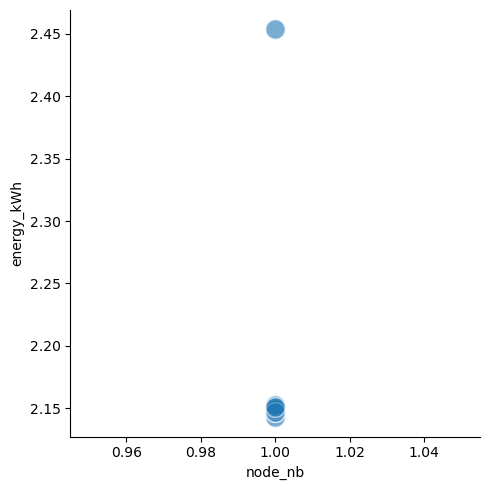

In [9]:
# mllog_train_samples mllog_d_batch_size sub_batch-size sub_num-sample
import seaborn as sns
plt.figure(figsize=(15,8))
sns.relplot(
    data=jobs,
    x="node_nb", y="energy_kWh", hue="sub_seed", s=200, alpha=0.6, palette="flare"
)

/var/folders/yq/7v824pz907x0d1tjqclbqmn80000gn/T/ipykernel_77806/3188446641.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

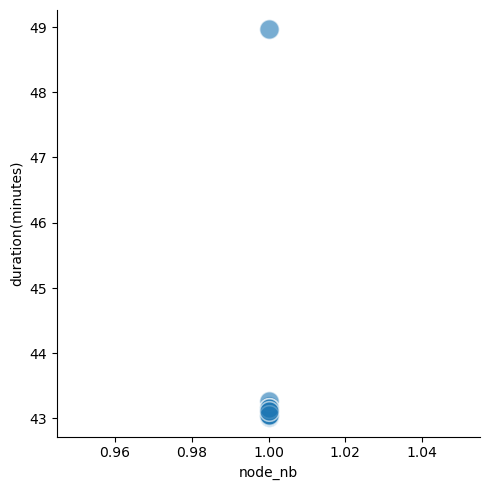

In [10]:
# mllog_train_samples mllog_d_batch_size sub_batch-size sub_num-sample
import seaborn as sns
plt.figure(figsize=(15,8))
sns.relplot(
    data=jobs,
    x="node_nb", y="duration(minutes)", hue="sub_seed", s=200, alpha=0.6, palette="flare"
)

# MLLOGS

In [12]:
list(jobs.job)

[126852,
 126853,
 126854,
 126855,
 126856,
 126857,
 126858,
 126859,
 126860,
 126861,
 126862,
 126863]

In [13]:
plot_df = jobs[(jobs["job"]==126852)]

file = plot_df.file.values[0]
file.split("/")[-2:]

log_file = path + "/".join(file.split("/")[-2:])
print(log_file)


/Users/mathildepro/Documents/code_projects/hpe_logs/resultats_nov/maskrcnn/126852/231109170627504019023_1.log


In [62]:

import sys
sys.path.append("../../../logging/mlperf_logging/")
# /Users/mathildepro/Documents/code_projects/ai-energy-consumption-framework/ML_benchmark/visualise_results/logging/mlperf_logging/compliance_checker/mlp_parser
from compliance_checker.mlp_parser import parse_file
loglines, _ = parse_file(log_file, ruleset="2.1.0")
raw_mllog = pd.DataFrame(loglines)
raw_mllog

,full_string,timestamp,key,value,lineno
0,":::MLLOG {""...",1.699546e+12,submission_...,{'value': '...,0
1,":::MLLOG {""...",1.699546e+12,submission_org,{'value': '...,1
2,":::MLLOG {""...",1.699546e+12,submission_...,{'value': '...,2
3,":::MLLOG {""...",1.699546e+12,submission_...,{'value': '...,3
4,":::MLLOG {""...",1.699546e+12,submission_...,{'value': '...,4
...,...,...,...,...,...
833,":::MLLOG {""...",1.699549e+12,tracked_stats,{'value': {...,833
834,":::MLLOG {""...",1.699549e+12,throughput,{'value': 6...,834
835,":::MLLOG {""...",1.699549e+12,eval_accuracy,{'value': {...,835
836,":::MLLOG {""...",1.699549e+12,eval_stop,{'value': N...,836


In [36]:
pd.json_normalize(raw_mllog["value"].values[835]).to_dict()

{'value.BBOX': {0: 0.3795445649082787},
 'value.SEGM': {0: 0.3434522898655179},
 'metadata.file': {0: 'maskrcnn/tools/train_mlperf.py'},
 'metadata.lineno': {0: 149},
 'metadata.epoch_num': {0: 14}}

In [37]:
raw_mllog["value"].values[835]

{'value': {'BBOX': 0.3795445649082787, 'SEGM': 0.3434522898655179},
 'metadata': {'file': 'maskrcnn/tools/train_mlperf.py',
  'lineno': 149,
  'epoch_num': 14}}

In [38]:
raw_mllog["value"].values[833]

{'value': {'time': 0.14121003063357607,
  'data': 0.009652246233325657,
  'loss': 0.7676466914707301,
  'loss_classifier': 0.25712830166188516,
  'loss_box_reg': 0.12037855822199435,
  'loss_mask': 0.2860163483857761,
  'loss_objectness': 0.04686977740407055,
  'loss_rpn_box_reg': 0.05725370751211213,
  'throughput': 679.8383908655119},
 'metadata': {'file': '/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py',
  'lineno': 499,
  'step': 17150}}

In [70]:
def get_value(row):
    """Get key value pairs from mllog rows."""
    for key, value in row['metadata'].items():
        row["meta_"+key] = value
    return row

mllog = raw_mllog.copy()
mllog['metadata'] = raw_mllog.apply(lambda row: row['value']['metadata'], axis=1)
mllog['value'] = raw_mllog.apply(lambda row: row['value']['value'], axis=1)
mllog = mllog.apply(get_value, axis=1)


In [71]:
def normalize_value(row):
    """Get key value pairs from mllog rows."""
    if isinstance(row["value"], dict):
        new_values = pd.json_normalize(row["value"]).to_dict()
        for key, value in new_values.items():
            row[key] = value[0]
        return row
    return row

mllog = mllog.apply(normalize_value, axis=1)

In [75]:
cols = [x for x in mllog.columns if (x != "full_string") and (x != "value") and (x != "metadata")]
mllog[cols][-50:].style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

,BBOX,SEGM,data,key,lineno,loss,loss_box_reg,loss_classifier,loss_mask,loss_objectness,loss_rpn_box_reg,meta_epoch_count,meta_epoch_num,meta_file,meta_first_epoch_num,meta_lineno,meta_status,meta_step,meta_tensor,meta_throughput,throughput,time,timestamp
788,nan,nan,0.009611,tracked_stats,788,0.778370,0.121822,0.261581,0.288554,0.048284,0.058129,nan,nan,/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py,nan,499,nan,16150.000000,nan,nan,680.402259,0.141093,1699548480879.000000
789,nan,nan,nan,throughput,789,nan,nan,nan,nan,nan,nan,nan,nan,/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py,nan,502,nan,nan,nan,nan,nan,nan,1699548480879.000000
790,nan,nan,0.009598,tracked_stats,790,0.777846,0.121755,0.261372,0.288427,0.048214,0.058077,nan,nan,/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py,nan,499,nan,16200.000000,nan,nan,680.492264,0.141074,1699548487631.000000
791,nan,nan,nan,throughput,791,nan,nan,nan,nan,nan,nan,nan,nan,/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py,nan,502,nan,nan,nan,nan,nan,nan,1699548487631.000000
792,nan,nan,0.009587,tracked_stats,792,0.777336,0.121693,0.261158,0.288303,0.048146,0.058036,nan,nan,/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py,nan,499,nan,16250.000000,nan,nan,680.545263,0.141063,1699548494506.000000
793,nan,nan,nan,throughput,793,nan,nan,nan,nan,nan,nan,nan,nan,/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py,nan,502,nan,nan,nan,nan,nan,nan,1699548494506.000000
794,nan,nan,0.009573,tracked_stats,794,0.776732,0.121608,0.260908,0.288161,0.048069,0.057985,nan,nan,/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py,nan,499,nan,16300.000000,nan,nan,680.574509,0.141057,1699548501461.000000
795,nan,nan,nan,throughput,795,nan,nan,nan,nan,nan,nan,nan,nan,/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py,nan,502,nan,nan,nan,nan,nan,nan,1699548501461.000000
796,nan,nan,0.009561,tracked_stats,796,0.776218,0.121546,0.260694,0.288045,0.047997,0.057935,nan,nan,/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py,nan,499,nan,16350.000000,nan,nan,680.624291,0.141047,1699548508346.000000
797,nan,nan,nan,throughput,797,nan,nan,nan,nan,nan,nan,nan,nan,/workspace/object_detection/maskrcnn/maskrcnn_benchmark/engine/trainer.py,nan,502,nan,nan,nan,nan,nan,nan,1699548508346.000000


<Axes: xlabel='timestamp'>

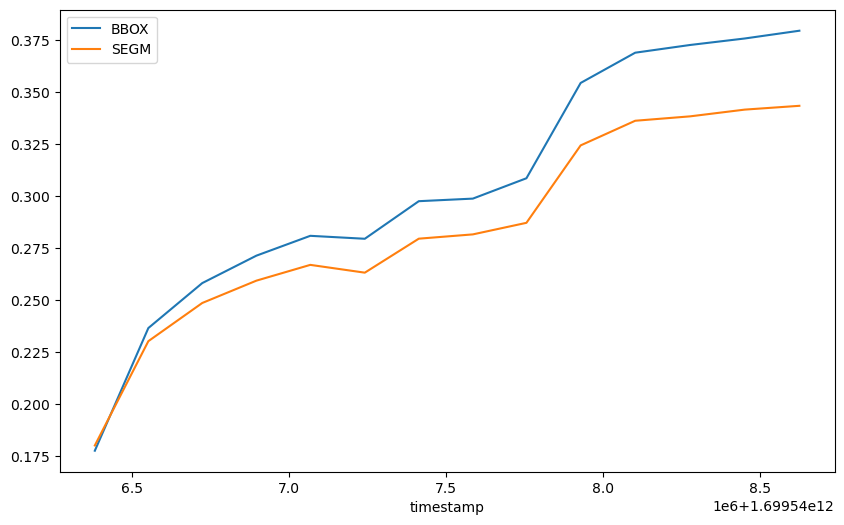

In [79]:
fig, ax = plt.subplots(figsize=(10,6))
mllog[mllog["key"]=="eval_accuracy"][["timestamp", "BBOX"]].plot(x="timestamp", y="BBOX", ax=ax)
mllog[mllog["key"]=="eval_accuracy"][["timestamp", "SEGM"]].plot(x="timestamp", y="SEGM", ax=ax)

In [86]:
tracked_data = list(mllog[mllog["key"]=="tracked_stats"]["value"].values[0].keys())

In [87]:
tracked_data

['time',
 'data',
 'loss',
 'loss_classifier',
 'loss_box_reg',
 'loss_mask',
 'loss_objectness',
 'loss_rpn_box_reg',
 'throughput']

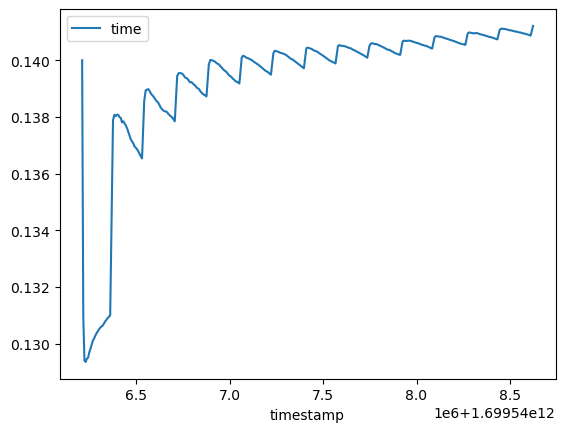

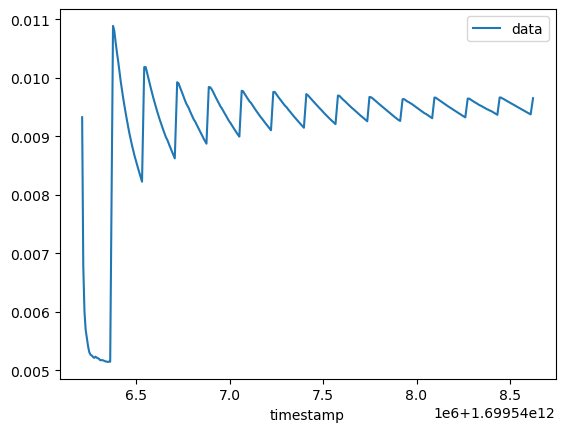

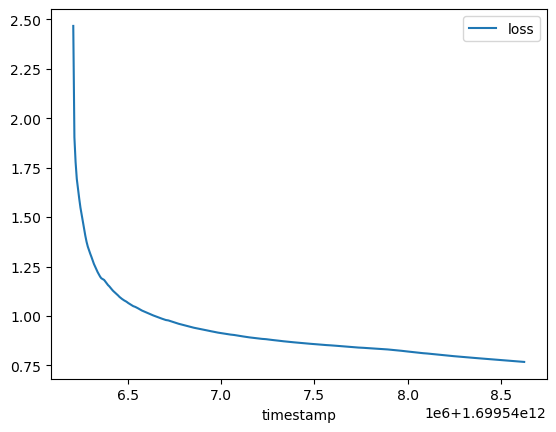

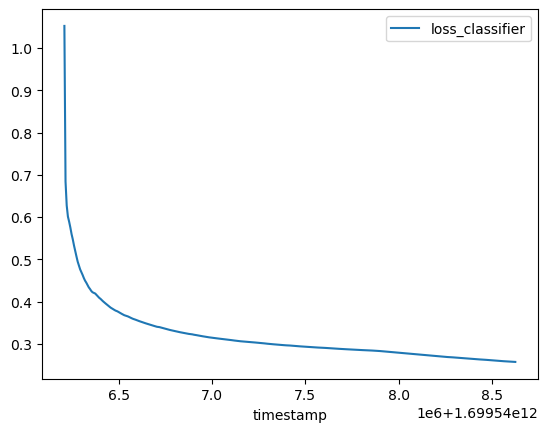

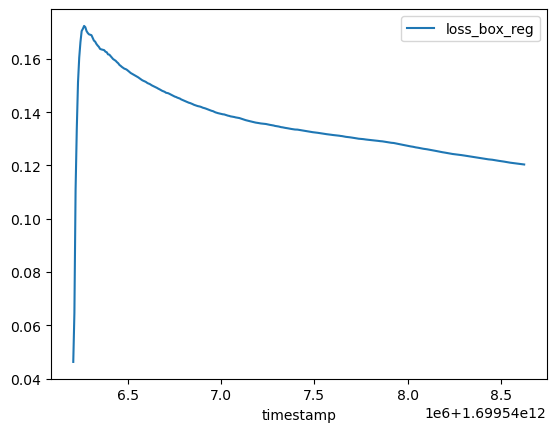

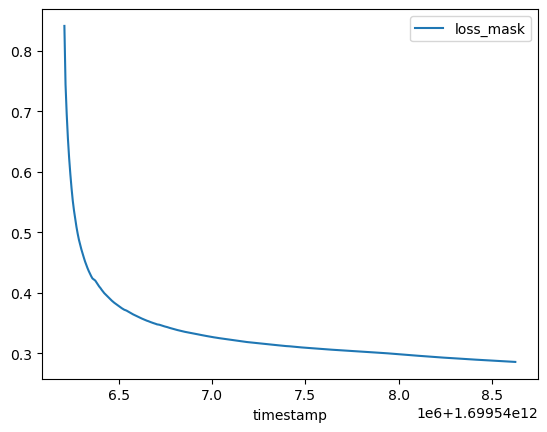

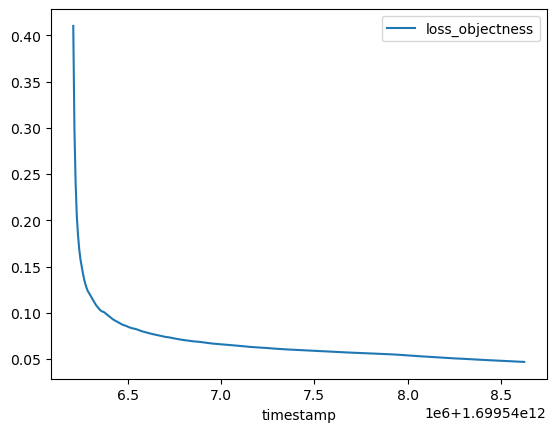

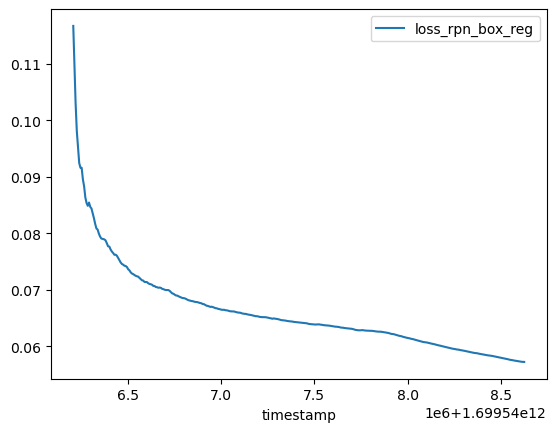

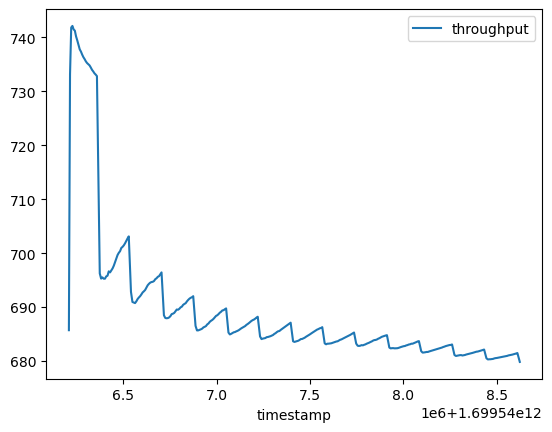

In [90]:
for tracked in tracked_data:
    mllog[mllog["key"]=="tracked_stats"][["timestamp", tracked]].plot(x="timestamp", y=tracked)